<a href="https://colab.research.google.com/github/nuzats19/Week2_Cab-InvestmentEDA/blob/main/EDA_of_cab_companies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import libraries

In [ ]:
#import libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
warnings.filterwarnings("ignore")

In [ ]:
#import cab data
cab_df = pd.read_csv('Cab_Data.csv')
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [ ]:
#import city data
city_df = pd.read_csv('City.csv')
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [ ]:
#transaction data import
transaction_id_df = pd.read_csv('Transaction_ID.csv')
transaction_id_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [ ]:
customer_id_df = pd.read_csv('Customer_ID.csv')
customer_id_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


#CAB Data

In [ ]:
#data info
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
#Check for nulll & duplicate value
print(cab_df.duplicated().sum())
print(cab_df.isnull().sum())


0
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [ ]:
#data type
cab_df.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [ ]:
## change the type of Date of Travel datatype into DateTime ##
a = cab_df['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_df['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [ ]:
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
#Cab Company
cab_df['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [ ]:
#Name of all cities
cab_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [ ]:
cab_df['profit']= cab_df['Price Charged'] - cab_df['Cost of Trip']
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844


#City Data

In [ ]:
#data info
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
#Check for nulll & duplicate value
print(city_df.duplicated().sum())
print(city_df.isnull().sum())


0
City          0
Population    0
Users         0
dtype: int64


In [ ]:
##Change data type of population & users##

# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

# Attribute 'Users' should be an integer
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(float)

In [ ]:
# check the data type again
city_df.dtypes

City           object
Population    float64
Users         float64
dtype: object

#Transaction Data

In [ ]:
#data info
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
#Check for nulll & duplicate value
print(transaction_id_df.duplicated().sum())
print(transaction_id_df.isnull().sum())


0
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


##Customer Data

In [ ]:
#data info
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
#Check for nulll & duplicate value
print(customer_id_df.duplicated().sum())
print(customer_id_df.isnull().sum())


0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


#Merge the whole dataset

In [ ]:
#joining transaction data and customer data using their common feature customer id
df1=pd.merge(transaction_id_df, customer_id_df, on=["Customer ID"])
df1.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [ ]:
#joining cab data and df1 using their common feature transaction id
df2=pd.merge(df1, cab_df, on=["Transaction ID"])
df2.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808


In [ ]:
#joining city data and df2 using their common feature city
final_df= pd.merge(df2, city_df, on=["City"])
final_df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,814885.0,24701.0
1,10351127,29290,Cash,Male,28,10813,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,814885.0,24701.0
2,10412921,29290,Card,Male,28,10813,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,814885.0,24701.0
3,10000012,27703,Card,Male,27,9237,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,814885.0,24701.0
4,10320494,27703,Card,Male,27,9237,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,814885.0,24701.0


##Check Outlier

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = zscore(final_df.select_dtypes(include=[float, int]))

# Identify outliers (where Z-score > 3)
outliers = (abs(z_scores) > 3).all(axis=1)

print("Number of Outliers Detected:", outliers.sum())
print("Sample Outliers:")
print(final_df[outliers].head())


Number of Outliers Detected: 0
Sample Outliers:
Empty DataFrame
Columns: [Transaction ID, Customer ID, Payment_Mode, Gender, Age, Income (USD/Month), Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, profit, Population, Users]
Index: []


       Transaction ID    Customer ID            Age  Income (USD/Month)  \
count    3.593920e+05  359392.000000  359392.000000       359392.000000   
mean     1.022076e+07   19191.652115      35.336705        15048.822937   
min      1.000001e+07       1.000000      18.000000         2000.000000   
25%      1.011081e+07    2705.000000      25.000000         8424.000000   
50%      1.022104e+07    7459.000000      33.000000        14685.000000   
75%      1.033094e+07   36078.000000      42.000000        21035.000000   
max      1.044011e+07   60000.000000      65.000000        35000.000000   
std      1.268058e+05   21012.412463      12.594234         7969.409482   

                      Date of Travel   KM Travelled  Price Charged  \
count                         359392  359392.000000  359392.000000   
mean   2017-08-16 01:37:55.042293504      22.567254     423.443311   
min              2016-01-01 00:00:00       1.900000      15.600000   
25%              2016-11-22 00:00:00      12

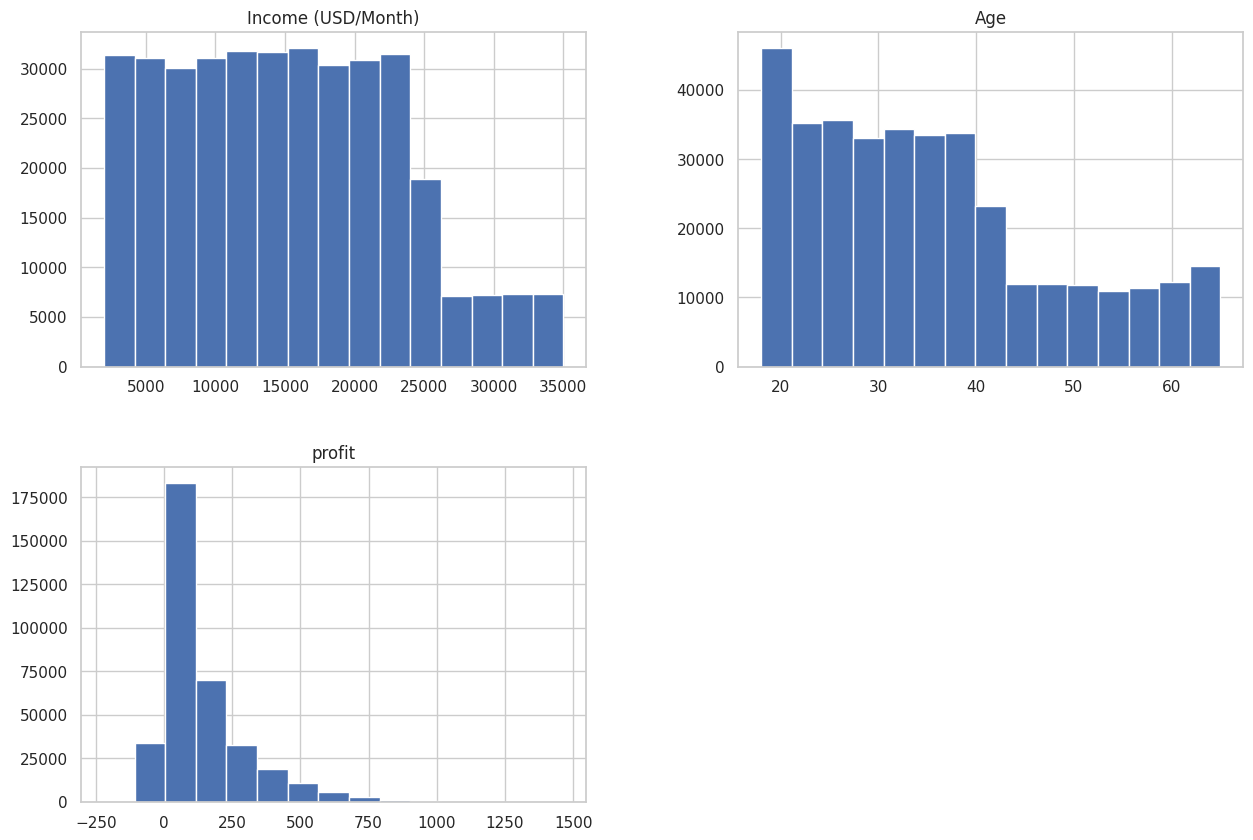

In [ ]:
descriptive_stats = final_df.describe()
print(descriptive_stats)

# Histograms for numerical columns
numerical_columns = ['Income (USD/Month)', 'Age', 'profit']
final_df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(2, 2))
plt.show()

We can see some outliers in price of charged but due to unavailability of trip duration data we are not considering it as ouliers.

###Check Corelation

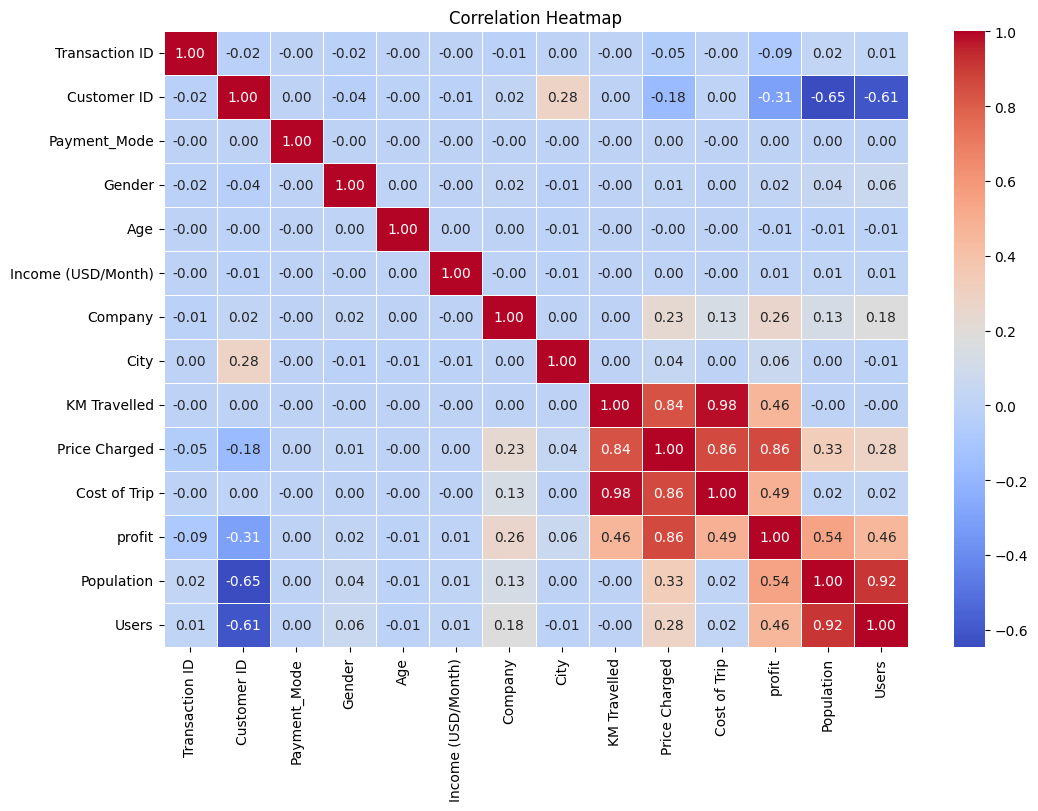

In [ ]:
 from sklearn.preprocessing import LabelEncoder
 #Identify non-numeric columns
non_numeric_cols = final_df.select_dtypes(exclude=[np.number]).columns

# Convert categorical columns to numeric if applicable
for col in non_numeric_cols:
    if final_df[col].dtype == 'object':
        final_df[col] = LabelEncoder().fit_transform(final_df[col])

# Now calculate the correlation matrix on numeric data
numeric_final_df = final_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_final_df.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**There is strong corelation between:**

*   **cost of trip vs km travelled vs profit**
*   **user vs population**


##Data Formatting

In [ ]:
final_df['Year'] = final_df['Date of Travel'].dt.year
final_df['Month'] = final_df['Date of Travel'].dt.month
final_df['Day'] = final_df['Date of Travel'].dt.day
final_df['Number of Rides'] = final_df.groupby('Customer ID')['Transaction ID'].transform('count')

# Display the first few rows to confirm the extraction
print(final_df.head())

   Transaction ID  Customer ID  Payment_Mode  Gender  Age  Income (USD/Month)  \
0        10000011        29290             0       1   28               10813   
1        10351127        29290             1       1   28               10813   
2        10412921        29290             0       1   28               10813   
3        10000012        27703             0       1   27                9237   
4        10320494        27703             0       1   27                9237   

  Date of Travel  Company  City  KM Travelled  Price Charged  Cost of Trip  \
0     2016-01-07        0     0         30.45         370.95      313.6350   
1     2018-07-20        1     0         26.19         598.70      317.4228   
2     2018-11-22        1     0         42.55         792.05      597.4020   
3     2016-01-05        0     0         28.62         358.52      334.8540   
4     2018-04-20        1     0         36.38         721.10      467.1192   

     profit  Population    Users  Year  Mont

#EDA

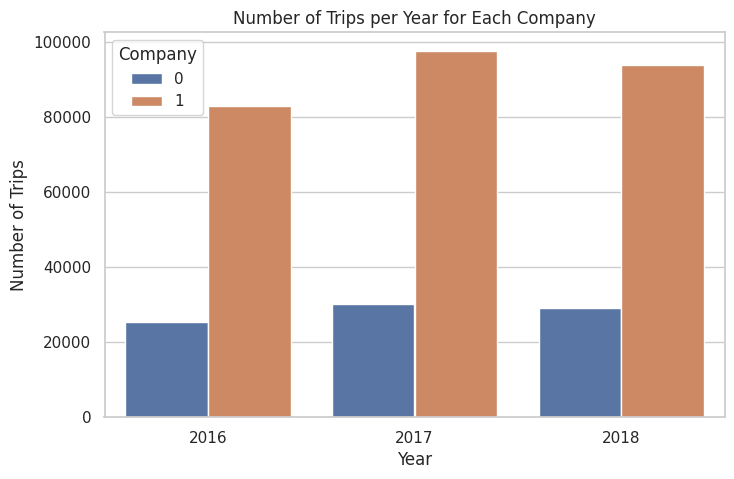

In [ ]:

trips_per_year = final_df.groupby(['Year', 'Company']).size().reset_index(name='Number of Trips')

# Display the grouped data
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(8, 5))

# Plot the data
sns.barplot(x='Year', y='Number of Trips', hue='Company', data=trips_per_year)

# Add titles and labels
plt.title('Number of Trips per Year for Each Company')
plt.xlabel('Year')
plt.ylabel('Number of Trips')
plt.legend(title='Company') #0: Pink cab; 1:Yellow cab

# Show the plot
plt.show()



*   With respect to number of trips, people used cab services on 2017 the most; slightly low in 2018.

*   yellow cab took atleast 3/4 times number of trips than pink cab

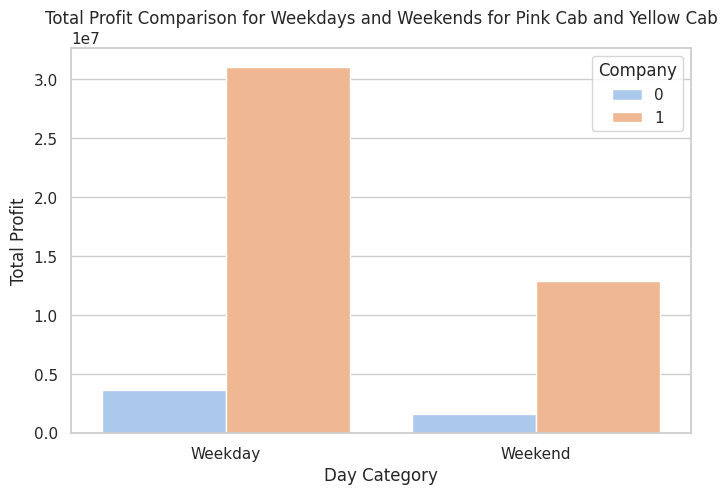

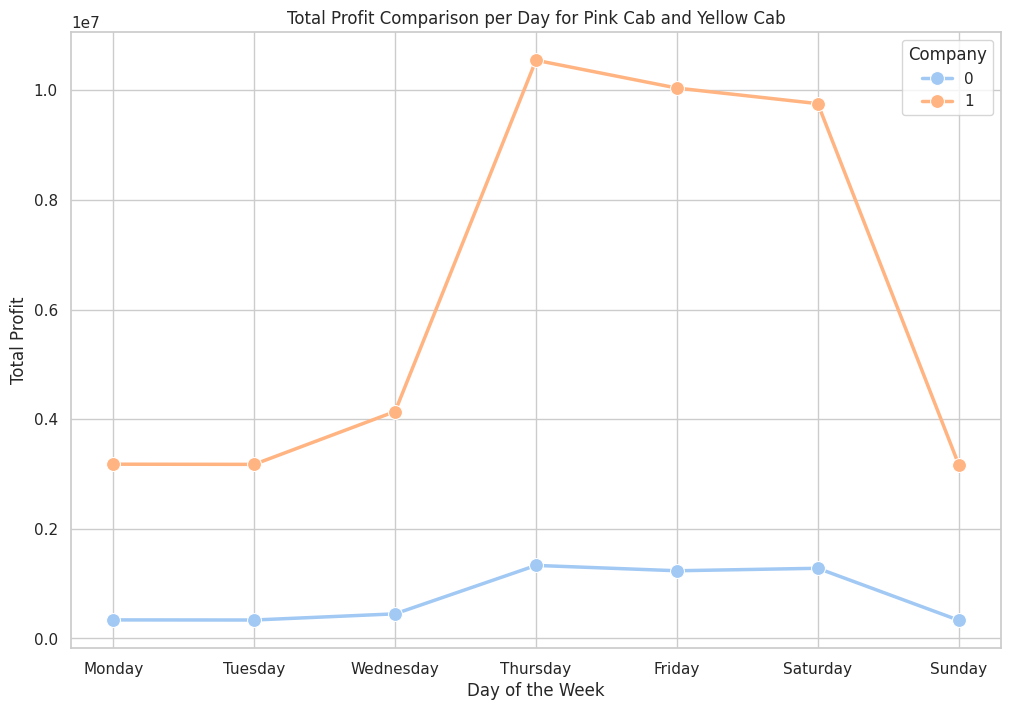

In [ ]:
# Extract the day of the week (Monday=0, Sunday=6)
final_df['Day of Week'] = final_df['Date of Travel'].dt.dayofweek

# Map the days to weekdays and weekends
final_df['Weekday/Weekend'] = final_df['Day of Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate total profit per day category and company
profit_per_category = final_df.groupby(['Weekday/Weekend', 'Company'])['profit'].sum().reset_index()

# Initialize the figure
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Plot total profit comparison using bar plot
sns.barplot(x='Weekday/Weekend', y='profit', hue='Company', data=profit_per_category, palette='pastel')

# Add titles and labels
plt.title('Total Profit Comparison for Weekdays and Weekends for Pink Cab and Yellow Cab')
plt.xlabel('Day Category')
plt.ylabel('Total Profit')
plt.legend(title='Company')

# Show the plot
plt.show()

# Map day of week numbers to names
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
final_df['Day Name'] = final_df['Day of Week'].map(day_mapping)

# Calculate total profit per day and company
profit_per_day = final_df.groupby(['Day Name', 'Company'])['profit'].sum().reset_index()

# Order the days correctly
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
profit_per_day['Day Name'] = pd.Categorical(profit_per_day['Day Name'], categories=ordered_days, ordered=True)
profit_per_day = profit_per_day.sort_values('Day Name')

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot total profit comparison using line plot
sns.lineplot(x='Day Name', y='profit', hue='Company', data=profit_per_day, marker='o', markersize=10, linewidth=2.5, palette='pastel')

# Add titles and labels
plt.title('Total Profit Comparison per Day for Pink Cab and Yellow Cab')
plt.xlabel('Day of the Week')
plt.ylabel('Total Profit')
plt.legend(title='Company')

# Show the plot
plt.show()

**In terms of days the profit margin pink cab profit margin doesnt fluctuate as much as yellow cab.**
**The demand for cab increases on weekdays specially thursday friday. The demand for cab in weekend is also high only on saturday**



65
18


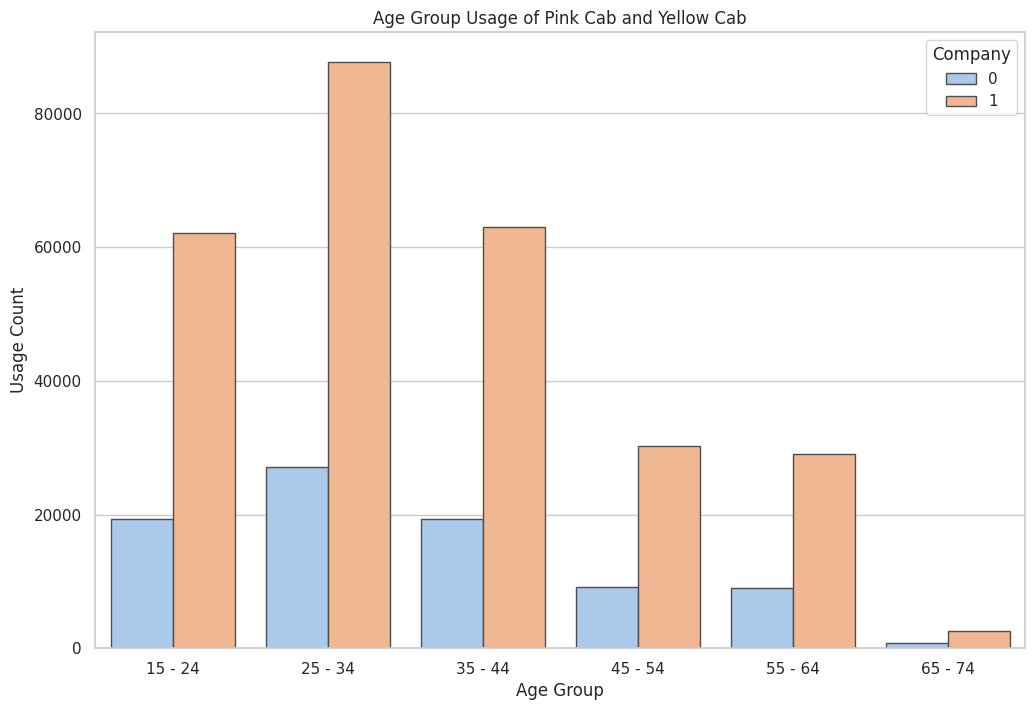

In [ ]:
#print the maximum and minimum age in the dataset
print(final_df['Age'].max())
print(final_df['Age'].min())
# Define labels for age groups
labels = ["{0} - {1}".format(i, i + 9) for i in range(15, 70, 10)]

# Bin ages into groups and create 'Age Group' column
final_df["Age Group"] = pd.cut(final_df.Age, bins=range(15, 76, 10), right=False, labels=labels)

age_group_company_usage = final_df.groupby(['Age Group', 'Company']).size().reset_index(name='Usage Count')

# Set the plot style
sns.set(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(12, 8))

# Plot age group usage by company
sns.barplot(x='Age Group', y='Usage Count', hue='Company', data=age_group_company_usage,
            palette='pastel', edgecolor='.3', order=labels)

# Add titles and labels
plt.title('Age Group Usage of Pink Cab and Yellow Cab')
plt.xlabel('Age Group')
plt.ylabel('Usage Count')
plt.legend(title='Company')

# Show the plot
plt.show()




*   **The age group of 25-35 range people are the highest user of cab. They are spending most money on cab services.**
*   **teenager and mid age like (35-44) people are also using cab more than the rest of the group.**

**They all prefer yellow cab over pink cab**



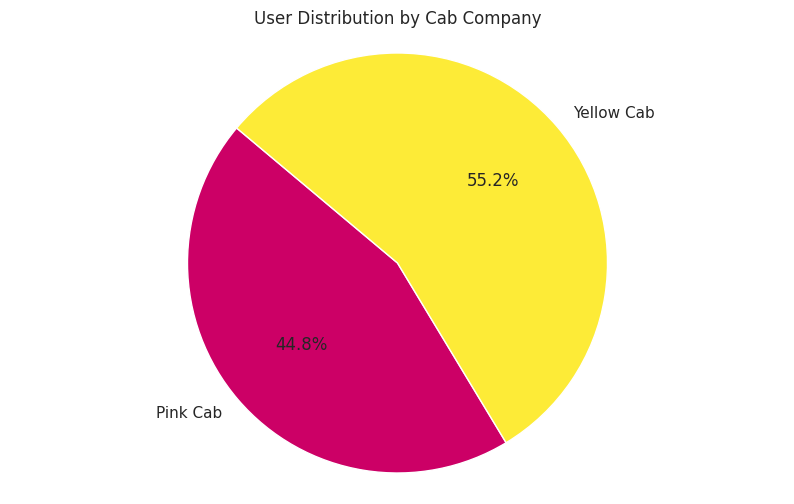

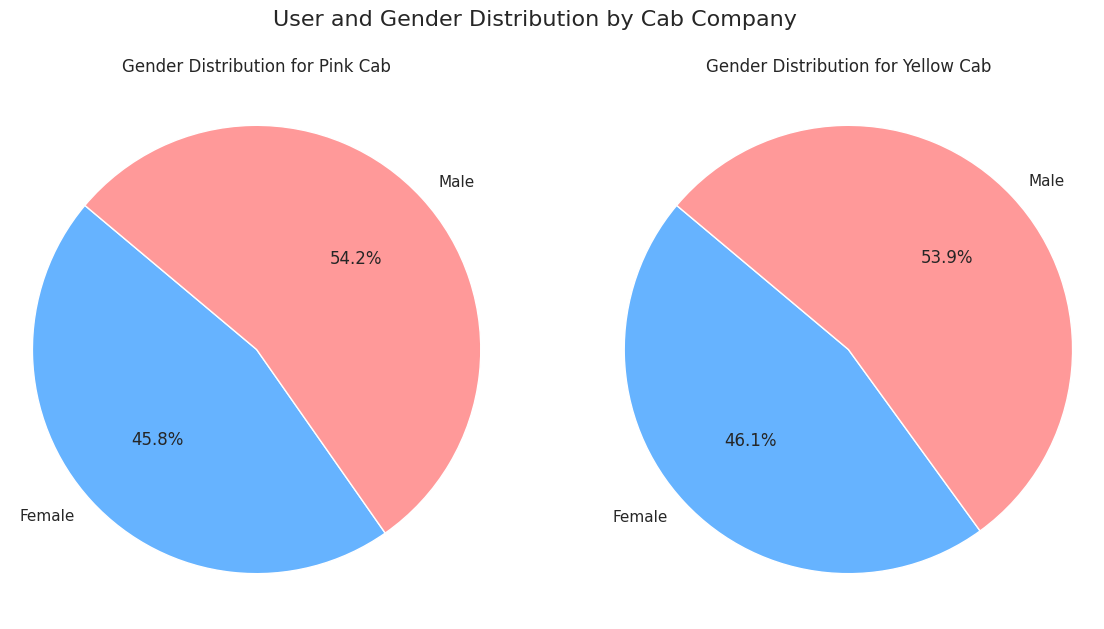

In [ ]:
user_counts = final_df.groupby('Company')['Customer ID'].nunique()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.1f%%', startangle=140, colors=['#cc0066', '#fdeb37'])
plt.title('User Distribution by Cab Company')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
gender_counts = final_df.groupby(['Company', 'Gender'])['Customer ID'].nunique().unstack()

# Plotting the pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Colors for the genders
colors = ['#66b3ff', '#ff9999']

for i, company in enumerate(gender_counts.index):
    axes[i].pie(gender_counts.loc[company], labels=gender_counts.columns, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'Gender Distribution for {company}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('User and Gender Distribution by Cab Company', size=16)
plt.show()



*   The highest number of users of cab services in both companies are man.
*   The all pre prefer yellow cab than pink cab



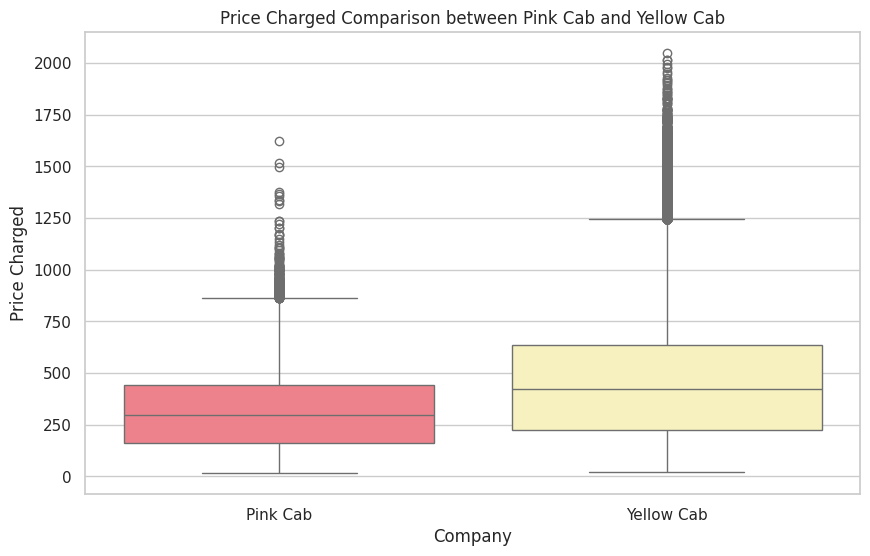

In [ ]:
custom_palette = {"Pink Cab": "#ff707e", "Yellow Cab": "#fff8b6"}

# Plotting with seaborn boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Price Charged', data=final_df, palette=custom_palette)
plt.title('Price Charged Comparison between Pink Cab and Yellow Cab')
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.show()



*   **In terms of Price charge of cab companies, yellow cab is charging people more money than pink cab.**


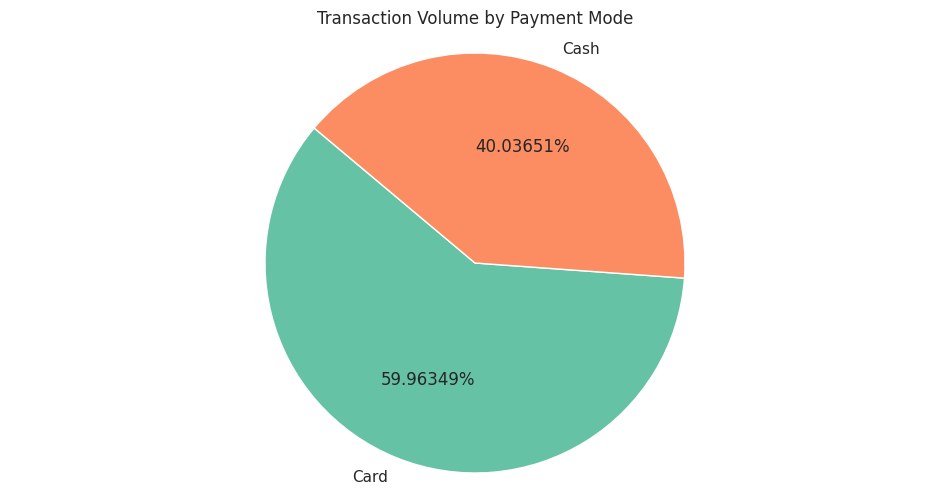

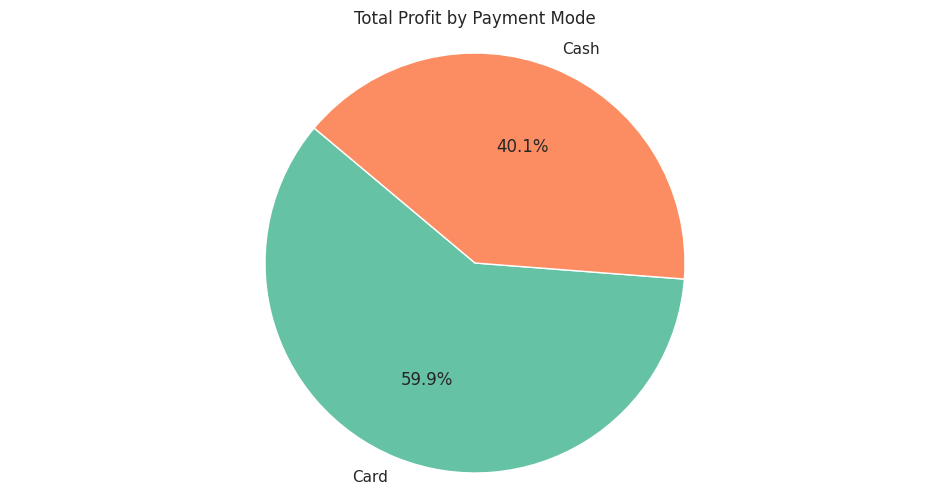

In [ ]:
# Group by Payment Mode
payment_mode_analysis = final_df.groupby('Payment_Mode').agg({'Transaction ID': 'size', 'profit': 'sum'}).reset_index()
payment_mode_analysis.columns = ['Payment Mode', 'Number of Transactions', 'Total Profit']

colors = sns.color_palette("Set2")

# Plot payment mode analysis using pie charts with different colors
plt.figure(figsize=(12, 6))
plt.pie(payment_mode_analysis['Number of Transactions'], labels=payment_mode_analysis['Payment Mode'], autopct='%1.5f%%', startangle=140, colors=colors)
plt.title('Transaction Volume by Payment Mode')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

plt.figure(figsize=(12, 6))
plt.pie(payment_mode_analysis['Total Profit'], labels=payment_mode_analysis['Payment Mode'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Total Profit by Payment Mode')
plt.axis('equal')
plt.show()


*   **In both cab companies, users prefered card for transaction more than cash.**
*   **Cab companies profitted more in card transaction than cash transaction.**

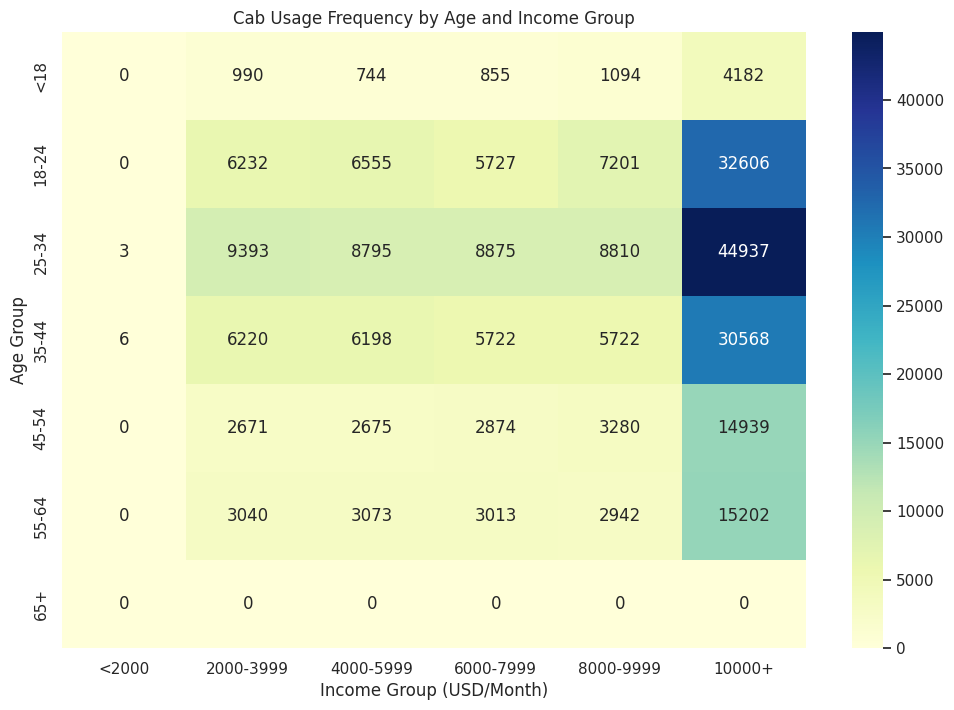

In [ ]:
# Create bins for age and income
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
final_df['Age Group'] = pd.cut(final_df['Age'], bins=age_bins, labels=age_labels)

income_bins = [0, 2000, 4000, 6000, 8000, 10000, 20000]
income_labels = ['<2000', '2000-3999', '4000-5999', '6000-7999', '8000-9999', '10000+']
final_df['Income Group'] = pd.cut(final_df['Income (USD/Month)'], bins=income_bins, labels=income_labels)

# Create a pivot table to count the number of trips for each age and income group
pivot_table = final_df.pivot_table(index='Age Group', columns='Income Group', values='Transaction ID', aggfunc='count')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Cab Usage Frequency by Age and Income Group')
plt.xlabel('Income Group (USD/Month)')
plt.ylabel('Age Group')
plt.show()


**1.Tha heatmap showed people with 10000+ income use cab services more than other income people.  2.The analysis also showed that the age group of 25-34 people who earned more than 10000 use cab most frequently.**


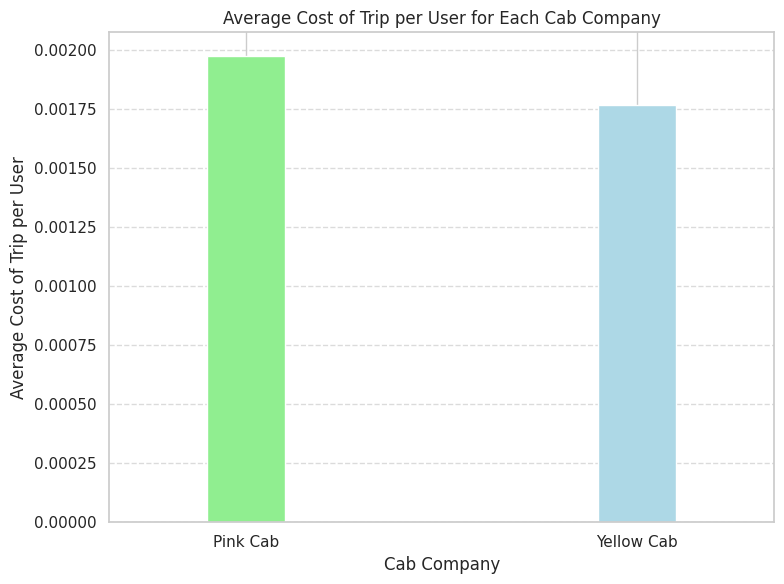

In [ ]:
# Group by company and calculate total cost of trip and number of users
company_grouped = final_df.groupby('Company').agg({'Cost of Trip': 'sum', 'Users': 'sum'})

# Calculate cost of trip per user
company_grouped['Cost per User'] = company_grouped['Cost of Trip'] / company_grouped['Users']

# Plotting the bar plot
company_grouped['Cost per User'].plot(kind='bar', figsize=(8, 6), color=['lightgreen', 'lightblue'], width=.2 )
plt.title('Average Cost of Trip per User for Each Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Average Cost of Trip per User')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



*   **The analysis shows that avaerage trip cost per user of pink cab cost more than yellow cab.**



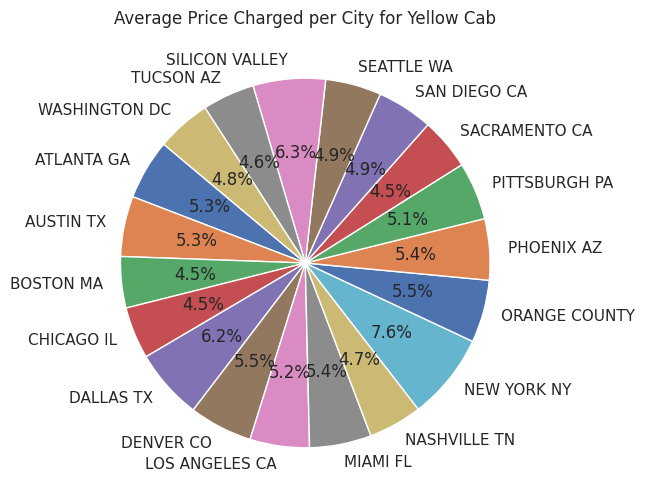

In [ ]:
# Filter the data for Yellow Cab
yellow_cab_data = final_df[final_df['Company'] == 'Yellow Cab']

# Calculate the average price charged per city for Yellow Cab
city_price_charged_yellow = yellow_cab_data.groupby('City')['Price Charged'].mean()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(city_price_charged_yellow, labels=city_price_charged_yellow.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Price Charged per City for Yellow Cab')
plt.show()


**As we can see in the pie chart shows, New york,Silicon Valley and Dallas TX are hiking more price per trip than other cities.**

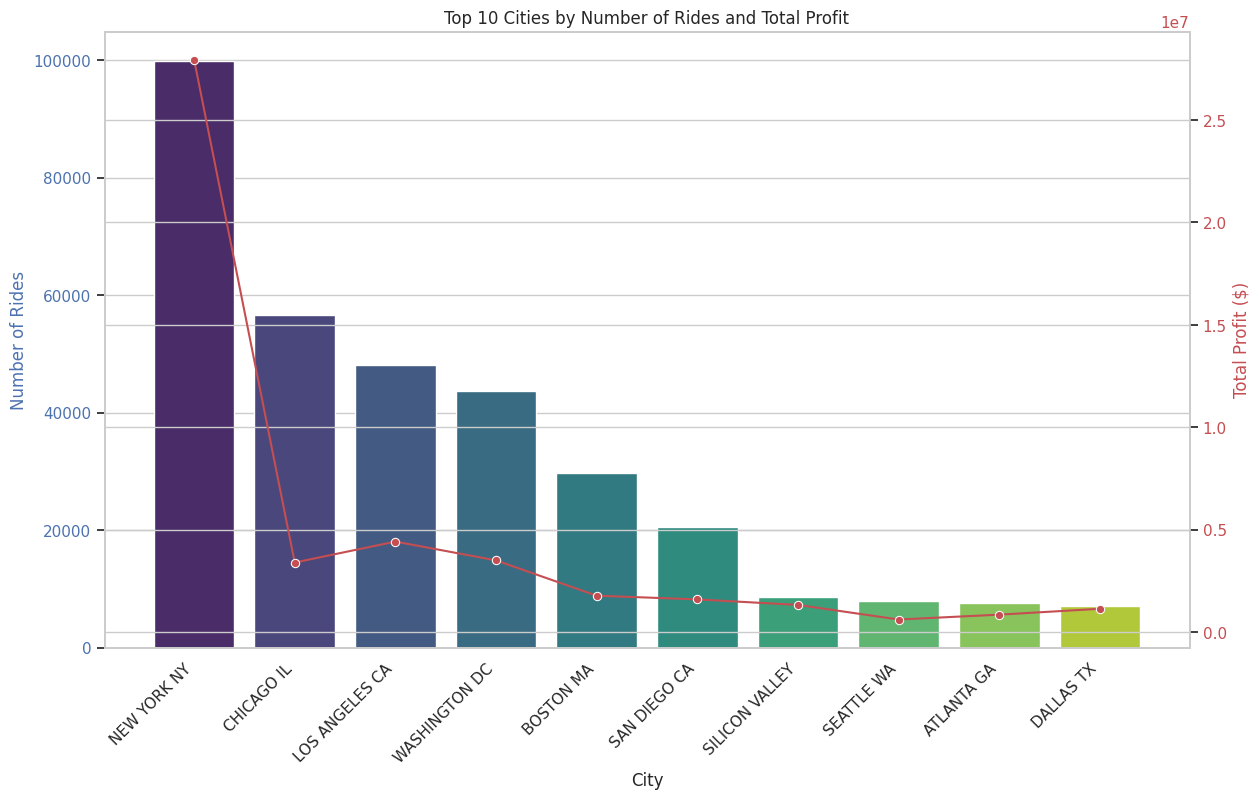

In [ ]:
# Group by city to find total number of rides and profit
city_analysis = final_df.groupby('City').agg({'Transaction ID': 'size', 'profit': 'sum'}).reset_index()
city_analysis.columns = ['City', 'Number of Rides', 'Total Profit']

# Get top 10 cities by number of rides
top_cities = city_analysis.sort_values('Number of Rides', ascending=False).head(10)

# Plot bar plot with dual axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Number of Rides
sns.barplot(x='City', y='Number of Rides', data=top_cities, ax=ax1, palette='viridis')
ax1.set_xlabel('City')
ax1.set_ylabel('Number of Rides', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Top 10 Cities by Number of Rides and Total Profit')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create second y-axis for Total Profit
ax2 = ax1.twinx()
sns.lineplot(x='City', y='Total Profit', data=top_cities, ax=ax2, color='r', marker='o')
ax2.set_ylabel('Total Profit ($)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()

**The analysis revealed that New York City, Chicago Los angeles and Washington DC are the top cities are profitting more in terms of number of rides**

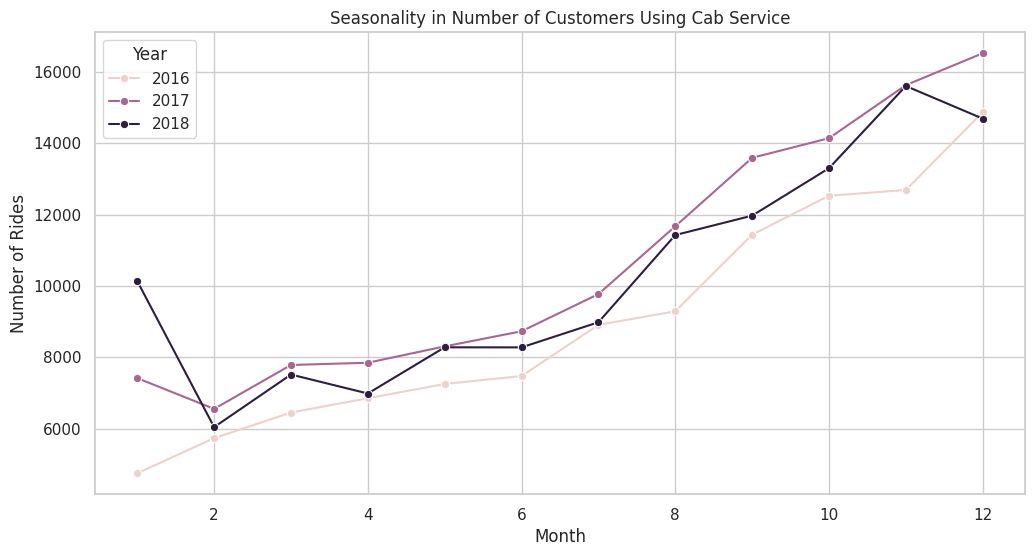

In [ ]:
monthly_data = final_df.groupby(['Year', 'Month']).size().reset_index(name='Number of Rides')

# Plot seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='Month', y='Number of Rides', hue='Year', marker='o')
plt.title('Seasonality in Number of Customers Using Cab Service')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.legend(title='Year')
plt.show()

**The line graph shows seasonality in the number of customers using the cab service. There are peaks in the spring and summer months (around months 4-6 and 8-11) and dips in the fall and winter months (around months 12 and 2).**

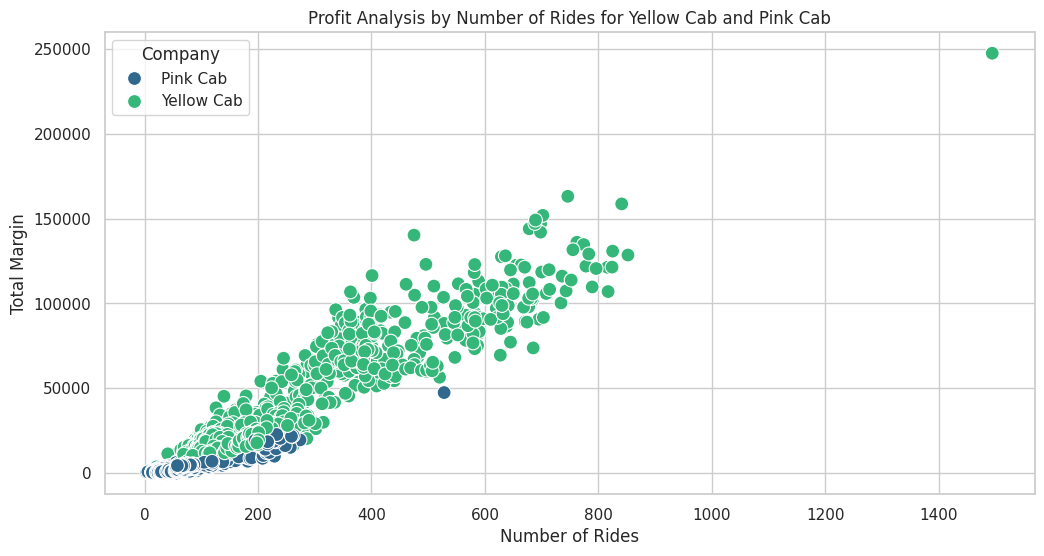

In [ ]:
# Group by date and company to find total margin and number of rides
margin_analysis = final_df.groupby(['Date of Travel', 'Company']).agg({'profit': 'sum', 'Transaction ID': 'size'}).reset_index()
margin_analysis.columns = ['Date of Travel', 'Company', 'Total Margin', 'Number of Rides']

# Plot margin analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(data=margin_analysis, x='Number of Rides', y='Total Margin', hue='Company', palette='viridis', s=100)
plt.title('Profit Analysis by Number of Rides for Yellow Cab and Pink Cab')
plt.xlabel('Number of Rides')
plt.ylabel('Total Margin')
plt.legend(title='Company')
plt.show()



*   **The total profit, however, is not proportional to the number of rides.**
*   **However the profit margin increases as the number of rides increases**



T-statistic: 12.70131593950141, P-value: 5.921884821314785e-37


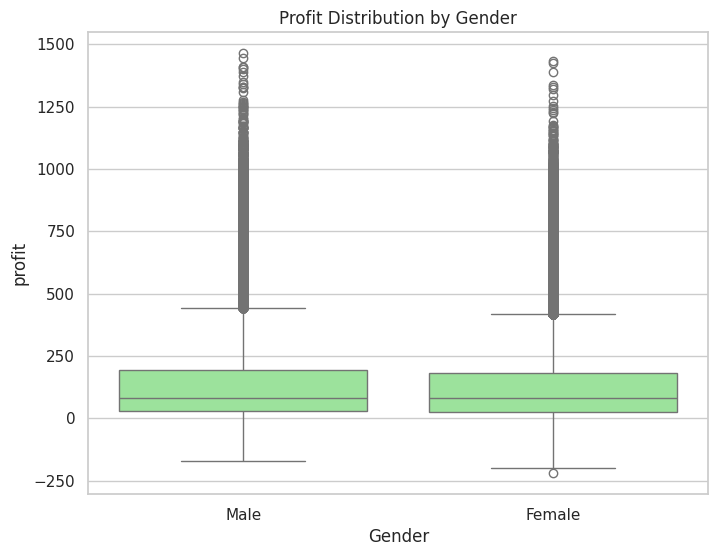

In [ ]:
import scipy.stats as stats
male_profit = final_df[final_df['Gender'] == 'Male']['profit']
female_profit = final_df[final_df['Gender'] == 'Female']['profit']

t_stat, p_value = stats.ttest_ind(male_profit, female_profit)
print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Visualizing the comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=final_df, x='Gender', y='profit', color='lightgreen')
plt.title('Profit Distribution by Gender')
plt.show()


* **T value is more than .5**
* **There is not a significant difference in profit between genders based on the graph too**

##EDA recommendations and hypothesis findings:
Analysis indicates that Yellow Cab is the best firm for XYZ to invest in. Even though yellow cabs charge more than pink cabs, customers prefer yellow cabs. Yellow cabs have a lower average cost of trip than pink cabs, and yellow cabs make the highest profit margins. People aged 18 to 35 prefer to use cabs. The majority of them use yellow taxis. As the number of rides increases, so does the profit and utilization. Customers especially demand cabs during the summer and spring. Even in the most populous cities, yellow cabs outnumber pink cabs in terms of journeys and users.  
